In [2]:
!pip install opendatasets --upgrade --quiet

In [4]:
import pandas as pd
import os
import opendatasets as od

In [8]:
#/kaggle/input/training/1286460.266939421_6128569.248177430_1287243.746479347_6129352.727717352.tiff
dataset = 'https://www.kaggle.com/ryanholbrook/dl-course-data'
dataset = "https://www.kaggle.com/datasets/easzil/training/data"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  jomasi


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/easzil/training


100%|██████████| 34.0M/34.0M [00:04<00:00, 7.46MB/s]


In [10]:
import os

# Get the current working directory
current_working_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_working_directory)


Current Working Directory: /Users/jonasvogt


In [12]:
!pip install pillow matplotlib


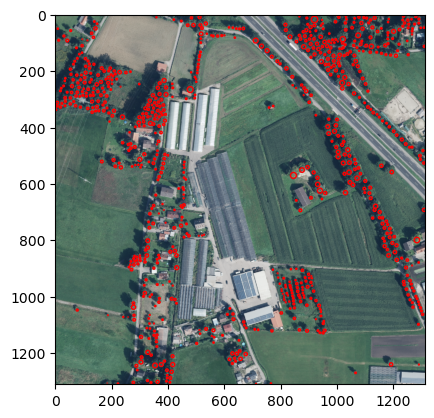

In [107]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    return img

def load_annotations(json_path):
    # Load annotations from the JSON file
    with open(json_path, 'r') as f:
        annotations = json.load(f)
    return annotations

def display_image_with_annotations(image_path, annotations):
    # Load image
    img = load_image(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Assuming annotations are in the format: [{"label": "label_name", "bbox": [xmin, ymin, xmax, ymax]}]
    for ann in annotations["shapes"][0:1]:
        bbox = ann['points']
        xmin, ymin = bbox[0]
        xmax, ymax = bbox[1]
        center_x = (xmin + xmax) / 2
        center_y = (ymin + ymax) / 2
        radius = max((xmax - xmin) / 2, (ymax - ymin) / 2)

        # Create a circle patch
        circle = patches.Circle((center_x, center_y), radius, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(circle)

        # Add label
        plt.text(center_x, center_y - radius - 10, ann['label'], color='red', fontsize=12, backgroundcolor='white')

    plt.show()

def display_image_with_annotations_wol(image_path, annotations, output_path):
     img = load_image(image_path)
     fig, ax = plt.subplots(1)
     ax.imshow(img)

    # Assuming annotations are in the format: [{"label": "label_name", "bbox": [xmin, ymin, xmax, ymax]}]
     for ann in annotations["shapes"]:
         bbox = ann['points']
         xmin, ymin = bbox[0]
         xmax, ymax = bbox[1]
         center_x = (xmin + xmax) / 2
         center_y = (ymin + ymax) / 2
         radius = max((xmax - xmin) / 2, (ymax - ymin) / 2)

        # Create a circle patch
         circle = patches.Circle((center_x, center_y), radius, linewidth=1, edgecolor='r', facecolor='none')
         ax.add_patch(circle)
         plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

     plt.show()

# Example usage
image_path = '/Users/jonasvogt/training/1269032.624490403_6139461.524708066_1269816.104030326_6140245.004247989.tiff'
json_path = '/Users/jonasvogt/training/1269032.624490403_6139461.524708066_1269816.104030326_6140245.004247989.json'
output_path ='/Users/jonasvogt/training/test.png'
annotations = load_annotations(json_path)
display_image_with_annotations_wol(image_path, annotations, output_path)
    